#Telco Customer churn prediction using Logistic Regeression

## Faizan Hameed

In [164]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [165]:
#changing the working directory
%cd /content/gdrive/My Drive/Datasets

/content/gdrive/My Drive/Datasets


In [166]:
#check the content in our directory
!ls

finalized_model.sav	     WISDM_ar_v1.1_raw.txt
readme.txt		     WISDM_ar_v1.1_trans_about.txt
Telco-Customer-Churn.csv     WISDM_ar_v1.1_transformed.arff
WISDM_ar_v1.1_raw_about.txt


#### i) Importing Libraries

In [167]:
#Importing some basic libraries. We will import other libraries as per requirement
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### ii) Importing Dataset

In [168]:
df = pd.read_csv('Telco-Customer-Churn.csv') #Importing dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [169]:
#checking the shape of dataframe
df.shape

(7043, 21)

#### iii) Data pre-processing and Analysis

In [170]:
# We want to replace missing values i.e "?" with "NaN"
df.replace("?", np.nan, inplace = True)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
#checking the missing values in every column
missing_values = df.isnull()
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())


customerID
False    7043
Name: customerID, dtype: int64
gender
False    7043
Name: gender, dtype: int64
SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64
Partner
False    7043
Name: Partner, dtype: int64
Dependents
False    7043
Name: Dependents, dtype: int64
tenure
False    7043
Name: tenure, dtype: int64
PhoneService
False    7043
Name: PhoneService, dtype: int64
MultipleLines
False    7043
Name: MultipleLines, dtype: int64
InternetService
False    7043
Name: InternetService, dtype: int64
OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64
OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64
DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64
TechSupport
False    7043
Name: TechSupport, dtype: int64
StreamingTV
False    7043
Name: StreamingTV, dtype: int64
StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64
Contract
False    7043
Name: Contract, dtype: int64
PaperlessBilling
False    7043
Name: PaperlessBilling, dtype: int6

In [172]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 r

In [173]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [174]:
#To proceed further it is important to change the data type from oobject to float. We are doing 'label encoding' for this purpose.
for column in df.columns:
  if df[column].dtype==('object'):
    from sklearn.preprocessing import LabelEncoder #Importing the library 
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column]) #Label Encoding
  else:
    continue
#Changing the datatype of all column to 'float64'

for column in df.columns:
  if df[column].dtype== 'int64':
    df[column]=df[column].astype(float)
df.dtypes #data type of every variable

customerID          float64
gender              float64
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [175]:
#Feature Selection
from scipy import stats # importing the stats library
#Checking p-value of all columns
for column in df.columns:
  pearson_coef, p_value = stats.pearsonr(df[column], df['Churn'])
  print('Column:  ',column)
  print("The Pearson Correlation Coefficient=  ", pearson_coef, "    with a P-value of P =", p_value)
  if p_value < 0.05:
    print('Correlation is significant')
  else:
    print('Correlation is not significant')
  print('---------------')

Column:   customerID
The Pearson Correlation Coefficient=   -0.01744721141657948     with a P-value of P = 0.14317575441091074
Correlation is not significant
---------------
Column:   gender
The Pearson Correlation Coefficient=   -0.00861209507899774     with a P-value of P = 0.4699045390984688
Correlation is not significant
---------------
Column:   SeniorCitizen
The Pearson Correlation Coefficient=   0.1508893281764723     with a P-value of P = 3.839860055791039e-37
Correlation is significant
---------------
Column:   Partner
The Pearson Correlation Coefficient=   -0.15044754495917637     with a P-value of P = 6.220731129623087e-37
Correlation is significant
---------------
Column:   Dependents
The Pearson Correlation Coefficient=   -0.1642214015797252     with a P-value of P = 9.140432989098723e-44
Correlation is significant
---------------
Column:   tenure
The Pearson Correlation Coefficient=   -0.352228670113078     with a P-value of P = 7.999057960599509e-205
Correlation is signi

In [176]:
#Dropping some columns that are not much important
df.drop(columns=['customerID','gender','TotalCharges'],axis=1,inplace=True)
df.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,0.0
1,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.0
2,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,1.0


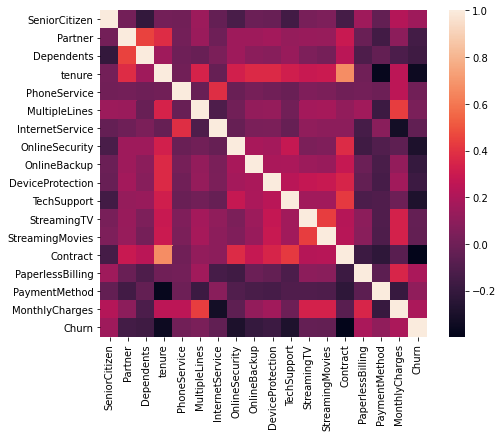

In [177]:
import seaborn as sns # Importing seaborn library
Correlation_matrix  = df.corr() 
fig = plt.figure(figsize = (8, 6)) 
sns.heatmap(Correlation_matrix, vmax = 1, square = True) 
plt.show()

In [178]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [179]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'Churn'],
      dtype='object')

In [180]:
df['Churn'].value_counts() #Number of samples in each class of target variable

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [181]:
# Get unique count for each column(variable)
df.nunique() #Number of unique values in each variable

SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
Churn                  2
dtype: int64

In [182]:
#We have label encoded each class
df['Churn'].unique()

array([0., 1.])

There are two classis so we can use binery classification method for prediction.

In [183]:
#Splitting the features and target
features = df.drop(columns=['Churn'],axis = 1)
target= df['Churn']
features,target

(      SeniorCitizen  Partner  ...  PaymentMethod  MonthlyCharges
 0               0.0      1.0  ...            2.0           29.85
 1               0.0      0.0  ...            3.0           56.95
 2               0.0      0.0  ...            3.0           53.85
 3               0.0      0.0  ...            0.0           42.30
 4               0.0      0.0  ...            2.0           70.70
 ...             ...      ...  ...            ...             ...
 7038            0.0      1.0  ...            3.0           84.80
 7039            0.0      1.0  ...            1.0          103.20
 7040            0.0      1.0  ...            2.0           29.60
 7041            1.0      1.0  ...            3.0           74.40
 7042            0.0      0.0  ...            0.0          105.65
 
 [7043 rows x 17 columns], 0       0.0
 1       0.0
 2       1.0
 3       0.0
 4       1.0
        ... 
 7038    0.0
 7039    0.0
 7040    0.0
 7041    1.0
 7042    0.0
 Name: Churn, Length: 7043, dtype: fl

In [184]:
#splitting the dataframe into "train" and "test" datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=1)

In [185]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scl=scaler.fit_transform(x_train)
x_test_scl=scaler.fit_transform(x_test)


#### iv) Building the Model

In [186]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_scl,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### v) Evaluating the Model

In [187]:
#Training set score
print(model.score(x_train_scl , y_train))

0.802626908058218


In [188]:
#Test set score
print(model.score(x_test_scl , y_test))

0.8034066713981547


In [193]:
# Confusion Metrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[929, 132],
       [145, 203]])

#### vi) Predicting

In [189]:
#predicting
pred=model.predict(x_test_scl)
pred

array([0., 0., 0., ..., 0., 0., 1.])

In [192]:
print('Real Values= ',y_test[45:50],'Predicted Values=  ',pred[45:50])

Real Values=  231     0.0
3712    0.0
2168    1.0
2445    0.0
4678    1.0
Name: Churn, dtype: float64 Predicted Values=   [0. 0. 1. 0. 1.]


In [194]:
# Checking the difference between predicted values and actual values
df=pd.DataFrame({'Labels':y_test, 'Predicted Value':pred})
df

,Labels,Predicted Value
3381,0.0,0.0
6180,0.0,0.0
4829,0.0,0.0
3737,1.0,0.0
4249,0.0,0.0
...,...,...
2563,1.0,1.0
2028,0.0,0.0
2899,0.0,0.0
3474,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


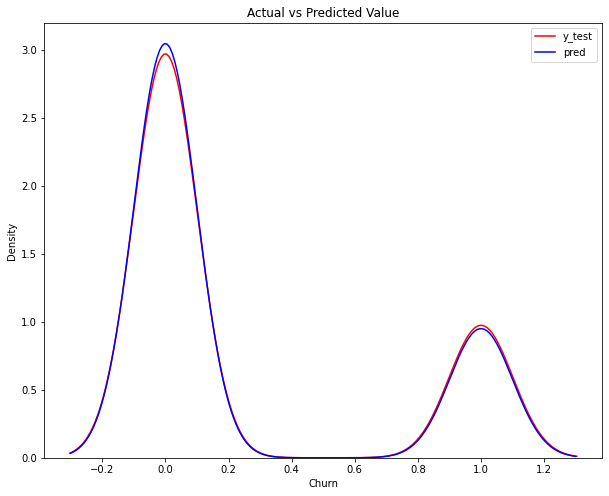

In [217]:
# Plotting the Actual and Predicted values
import seaborn as sns
plt.figure(figsize=(10, 8))

ax = sns.distplot(y_test, hist=False, color="r")
sns.distplot(pred, hist=False, color="b" , ax=ax)

plt.title('Actual vs Predicted Value')

plt.legend(['y_test', 'pred'])

